In [8]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

image_url = "/content/Screenshot 2024-10-29 at 7.08.13 PM.png"
image = Image.open(image_url)
# Check for cats and remote controls
# VERY important: text queries need to be lowercased + end with a dot
text = "brave browser icon."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)


ValueError: Unable to infer channel dimension format

In [2]:
print(results)

[{'scores': tensor([0.4015, 0.4404, 0.4279]), 'labels': ['a cat', 'a remote control', 'a cat'], 'boxes': tensor([[346.2180,  22.1837, 637.4595, 374.6706],
        [ 38.3508,  70.1000, 176.6963, 117.9254],
        [ 10.2021,  52.4842, 316.9324, 472.7568]])}]


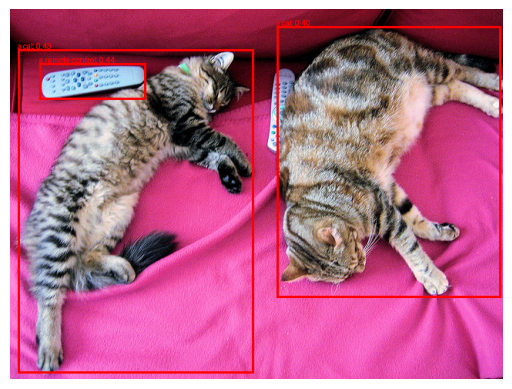

In [5]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

draw = ImageDraw.Draw(image)
for i, (score, label, box) in enumerate(zip(results[0]["scores"], results[0]["labels"], results[0]["boxes"])):
    box = box.tolist()  # Convert tensor to list for easier handling
    score = score.item()  # Get the score as a float

    # Draw the bounding box
    draw.rectangle(box, outline="red", width=3)

    # Draw the label and score above the bounding box
    label_text = f"{label}: {score:.2f}"
    draw.text((box[0], box[1] - 10), label_text, fill="red")

# Display the image with bounding boxes
plt.imshow(image)
plt.axis("off")  # Hide axis
plt.show()

In [15]:
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

# Load the image and ensure it is in RGB mode
image_path = "/content/Screenshot 2024-10-29 at 7.08.13 PM.png"
image = Image.open(image_path).convert("RGB")  # Convert to RGB to avoid channel issues

# Define the text for object detection
text = "an icon on which there is lion image."

# Process inputs and run the model
inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the outputs to get bounding boxes and labels
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)

print(results)  # Print results to verify output


[{'scores': tensor([0.5141]), 'labels': ['an icon'], 'boxes': tensor([[ 993.9130, 1588.8140, 1125.2703, 1721.1738]])}]


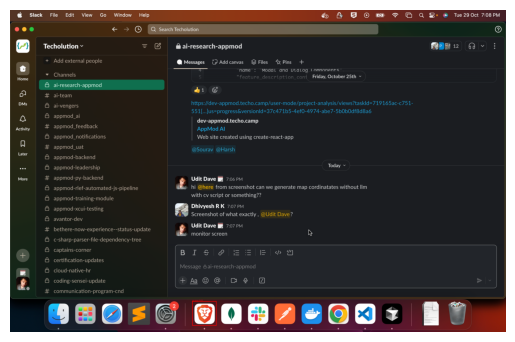

In [16]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

draw = ImageDraw.Draw(image)
for i, (score, label, box) in enumerate(zip(results[0]["scores"], results[0]["labels"], results[0]["boxes"])):
    box = box.tolist()  # Convert tensor to list for easier handling
    score = score.item()  # Get the score as a float

    # Draw the bounding box
    draw.rectangle(box, outline="red", width=3)

    # Draw the label and score above the bounding box
    label_text = f"{label}: {score:.2f}"
    draw.text((box[0], box[1] - 10), label_text, fill="red")

# Display the image with bounding boxes
plt.imshow(image)
plt.axis("off")  # Hide axis
plt.show()